In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Article: https://medium.com/towards-data-science/5-steps-to-build-beautiful-line-charts-with-python-655ac5477310
Data source: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

In [2]:
# Read the data
df = pd.read_csv('csv/DP_LIVE_29102023232933044.csv')

In [15]:
top_20_countries = df[(df['TIME'] == 2022) & (df['MEASURE'] == 'USD_CAP')].sort_values(['Value'], ascending=False).head(20)['LOCATION'].to_list()

top_20_df = df[['LOCATION','TIME','Value']][df['LOCATION'].isin(top_20_countries)].reset_index(drop = True)

In [21]:
top_20_countries

['LUX',
 'IRL',
 'NOR',
 'CHE',
 'USA',
 'DNK',
 'NLD',
 'ISL',
 'AUS',
 'AUT',
 'SWE',
 'BEL',
 'DEU',
 'FIN',
 'CAN',
 'EA19',
 'MLT',
 'FRA',
 'EU27_2020',
 'GBR']

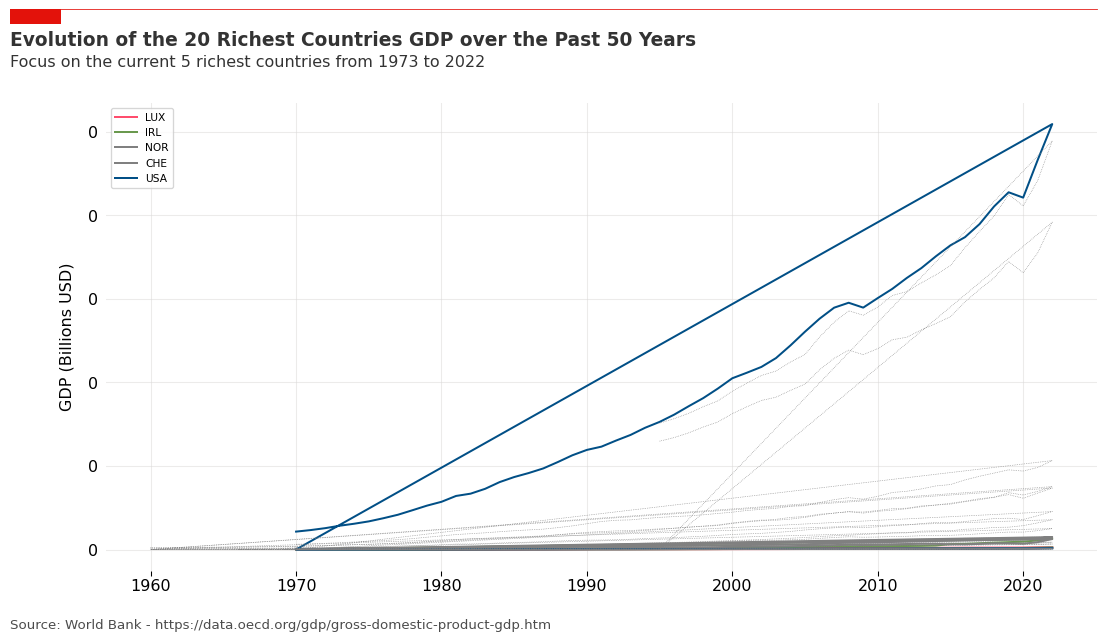

In [13]:
# Create the figure and axes objects, specify the size and the dots per inches
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

# Create the grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
ax.set_ylabel('GDP (Billions USD)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i: f'{s * 1e-9:,.0f}')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Color and line style
colors_dict = {'USA': '#014f86', 'AUT': '#DC0000', 'LUX': '#ff4d6d', 'CAN': '#403d39', 'IRL': '#6a994e'}
line_styles_dict = {'USA': '-', 'AUT': '-', 'LUX': '-', 'CAN': '-', 'IRL': '-'}

# Plot the Top 5 lines
for country in top_20_countries[:5]:
    color = colors_dict.get(country, 'grey')
    line_style = line_styles_dict.get(country, '-')
    data = df[df['LOCATION'] == country]
    ax.plot(data['TIME'], data['Value'], color=color, linestyle=line_style, zorder=2, label=country)

# Add legend
ax.legend(loc="best", fontsize=8)

# Plot the rest
for country in top_20_countries[5:]:
    data = df[df['LOCATION'] == country]
    ax.plot(data['TIME'], data['Value'], color='grey', linestyle=':', linewidth=0.5, zorder=2)

# Remove the spines
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

# Make the left spine thicker
ax.spines['left'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, 0.9], [0.98, 0.98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=0.6)
ax.add_patch(plt.Rectangle((0.05, 0.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth=0))

# Add in title and subtitle
ax.text(x=0.05, y=0.93, s="Evolution of the 20 Richest Countries GDP over the Past 50 Years", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=0.8)
ax.text(x=0.05, y=0.90, s="Focus on the current 5 richest countries from 1973 to 2022", transform=fig.transFigure, ha='left', fontsize=12, alpha=0.8)

# Set source text
ax.text(x=0.05, y=0.12, s="Source: World Bank - https://data.oecd.org/gdp/gross-domestic-product-gdp.htm", transform=fig.transFigure, ha='left', fontsize=10, alpha=0.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Add some text on the graph
annotation_text = 'During the 2000s,\nChina began experiencing rapid economic growth,\noutpacing all other countries.'
data_time = datetime(1998, 1, 1)
text_position = (data_time - timedelta(days=500), 1.8e13)
ax.annotate(annotation_text, (data_time, 2e12), xytext=text_position, ha='left', fontsize=9, arrowprops=dict(arrowstyle='-|>', facecolor='k', connectionstyle="arc3,rad=-0.15"))

plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Read the data
df = pd.read_csv('88a1e584-0a94-4e73-b650-749332831ef4_Data.csv', sep=',')
df.drop(['Series Name', 'Series Code', 'Country Code'], axis=1, inplace=True)
df = df.dropna(subset=['Country Name'])

# Filter on the Top 20 richest countries of 2022
top_20_countries = df[df['Year'] == '2022-01-01'].sort_values('GDP', ascending = False).head(20)['Country Name'].tolist()
df = df[df['Country Name'].isin(top_20_countries)].reset_index(drop = True)

df.head()

# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot lines
for country in top_20_countries:
    data = df[df['Country Name'] == country]
    line = ax.plot(data['Year'], data['GDP'], label=country)
    
# Add legend
ax.legend(loc="best", fontsize=8)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}') #in case we need additional formatting
#ax.xaxis.set_major_locator(MaxNLocator(integer=True)) #in case we need additional formatting
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
ax.set_ylabel('GDP (Billions USD)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s*10**-9:,.0f}')
#ax.yaxis.set_major_locator(MaxNLocator(integer=True)) #in case we need additional formatting
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Color and line style
colors_dict = {'United States': '#014f86', 'China': '#DC0000', 'Japan': '#ff4d6d', 'Germany': '#403d39', 'India': '#6a994e'}
line_styles_dict = {'United States': '-', 'China': '-', 'Japan': '-', 'Germany': '-', 'India': '-'}

# Plot the Top 5 lines
for country in top_20_countries[:5]:
    color = colors_dict.get(country, 'grey')  # get the color from the dictionary, default to grey if not found
    line_style = line_styles_dict.get(country, '-')  # get the line style from the dictionary, default to solid line if not found
    data = df[df['Country Name'] == country]
    line = ax.plot(data['Year'], data['GDP'], color=color, linestyle=line_style, zorder=2, label=country)

# Add legend
ax.legend(loc="best", fontsize=8)

# Plot the rest
for country in top_20_countries[5:]:
    data = df[df['Country Name'] == country]
    line = ax.plot(data['Year'], data['GDP'], color='grey', linestyle=':', linewidth=0.5, zorder=2)
    
# Remove the spines
ax.spines[['top','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['left'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Evolution of the 20 Richest Countries GDP over the Past 50 Years", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.90, s="Focus on the current 5 richest countries from 1973 to 2022", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
ax.text(x=0.05, y=0.12, s="Source: World Bank - https://databank.worldbank.org/", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Plot the Top 5 lines
for country in top_20_countries[:5]:
    color = colors_dict.get(country, 'grey')  # get the color from the dictionary, default to black if not found
    line_style = line_styles_dict.get(country, '-')  # get the line style from the dictionary, default to solid line if not found
    data = df[df['Country Name'] == country]
    line = ax.plot(data['Year'], data['GDP'], color=color, linestyle=line_style, zorder=2, label = country)
    ax.plot(data['Year'].iloc[-1], data['GDP'].iloc[-1], 'o', color=color, markersize=10, alpha=0.3)
    ax.plot(data['Year'].iloc[-1], data['GDP'].iloc[-1], 'o', color=color, markersize=5)

# Add some text on the graph
ax.annotate('During the 2000s,\nChina began experiencing rapid economic growth,\noutpacing all other countries.',
            (data['Year'].iloc[-18], 2000000000000),
            xytext=(data['Year'].iloc[-28]-timedelta(days=500), 18000000000000),
            ha='left', fontsize=9, arrowprops=dict(arrowstyle='-|>', facecolor='k', connectionstyle="arc3,rad=-0.15"))

FileNotFoundError: [Errno 2] No such file or directory: '88a1e584-0a94-4e73-b650-749332831ef4_Data.csv'